### Sprint8 アンサンブル学習

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

### データセットの用意

In [2]:
df = pd.read_csv("./train.csv")
df =df[['SalePrice','GrLivArea','YearBuilt']]
df.head()

,SalePrice,GrLivArea,YearBuilt
0,208500,1710,2003
1,181500,1262,1976
2,223500,1786,2001
3,140000,1717,1915
4,250000,2198,2000


In [3]:
X = df[['GrLivArea','YearBuilt']].values  # 説明変数は'GrLivArea','YearBuilt'
y = df[['SalePrice']].values  # 目的変数は'SalePrice'

In [4]:
X.shape

(1460, 2)

In [5]:
y.shape

(1460, 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
def train_test_split(X, y, train_size):
    """
    学習用データを分割する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, )
      正解値
    train_size : float (0<train_size<1)
      何割をtrainとするか指定

    Returns
    ----------
    X_train : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    X_test : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train : 次の形のndarray, shape (n_samples, )
      学習データの正解値
    y_test : 次の形のndarray, shape (n_samples, )
      検証データの正解値
    """
    #ここにコードを書く
    pass
    train_num  = np.fix(len(X) * train_size)
    test_num = len(X) - train_num
    X_len = len(X)
    Xy = pd.concat([X, y])
    Xy.take(np.random.permutation(len(Xy)))
    X = Xy[:1]
#     y =
    X_train = 1
    X_test =1
    y_train =1
    y_test =1
    
#     return X_train, X_test, y_train, y_test
    return 

In [8]:
SalePrice =df['SalePrice']
GrLivArea =df['GrLivArea']
YearBuilt =df['YearBuilt']

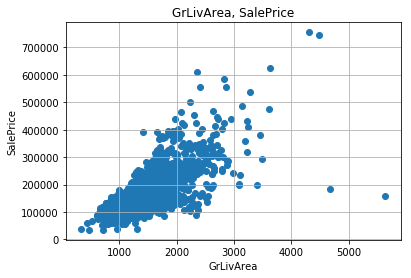

In [9]:
plt.scatter(GrLivArea, SalePrice)
plt.title("GrLivArea, SalePrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.grid(True)

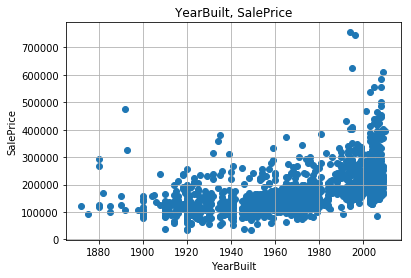

In [10]:
plt.scatter(YearBuilt, SalePrice)
plt.title("YearBuilt, SalePrice")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.grid(True)

In [11]:
# # sklearn.linear_model.LinearRegression クラスを読み込み
# from sklearn import linear_model
# clf = linear_model.LinearRegression()

# # 予測モデルを作成
# clf.fit(X, y)

# # 回帰係数
# print(clf.coef_)
 
# # 切片 (誤差)
# print(clf.intercept_)
 
# # 決定係数
# print(clf.score(X, y))

### ブレンディング

In [24]:
lr_pred_list = np.zeros(X_train[0])
tree_pred_list = np.zeros(X_train[0])

In [28]:
from sklearn.model_selection import KFold
kf = KFold(X_train.shape[0], n_folds=3, random_state=0)

TypeError: __init__() got an unexpected keyword argument 'n_folds'

In [13]:
# 回帰（数値を予測）、分類（ラベルを予測）
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, X_test, y_test, cv=10)


Ir_reg = LinearRegression()
svm_reg = SVR()
tree_reg = DecisionTreeRegressor()

# 予測モデルを作成
# 家の価格
# ->回帰問題
# ->

# for reg in (Ir_reg, svm_reg, tree_reg):
#     reg.fit(X_train, y_train[:,0])
#     y_pred = reg.predict(X_test)
#     print(reg.__class__, "MSE", np.sqrt((y_pred-y_test[:, 0])**2).mean())
#     print(y_pred[:10])
#     print("-----------------")

Ir_reg.fit(X_train, y_train[:,0])
svm_reg.fit(X_train, y_train[:,0])
tree_reg.fit(X_train, y_train[:,0])
    
y_pred_lr = Ir_reg.predict(X_test)
y_pred_svm = svm_reg.predict(X_test)
y_pred_tree = tree_reg.predict(X_test)

print('LinearRegression',((y_pred_lr-y_test[:, 0])**2).mean())
print('SVR',((y_pred_svm-y_test[:, 0])**2).mean())
print('DecisionTreeRegressor',((y_pred_tree-y_test[:, 0])**2).mean())

print("---------------------------")

#print("LR", y_pred_lr[:10])
#print("SVM", y_pred_svm[:10])
#print("TREE", y_pred_tree[:10])

#３つの推定値の平均を求める
# y_pred_ensemble = (y_pred_lr+y_pred_svm+y_pred_tree)/3
y_pred_ensemble = (y_pred_lr+y_pred_tree)/2
print("---------------------------")
#print("ENSEMBLE", y_pred_ensemble)
print("---------------------------")
#y_pred_ensembleの誤差を計算する
print('Ensemble',((y_pred_ensemble-y_test[:, 0])**2).mean() )

#単独の時と比べてどうなっているか確認する
# 線形回帰と決定木のアンサンブルが単独よりもいい結果が出た
# 他の２つの組み合わせ、および3つの組み合わせは単独よりも結果が良くなかった

LinearRegression 2495554898.67
SVR 7861854841.84
DecisionTreeRegressor 2332950956.97
---------------------------
---------------------------
---------------------------
Ensemble 1971027008.16


In [14]:
# # ランダムフォレスト、VotingClassifier、ロジスティック回帰、SVMの分類器読み込む
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import VotingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC

# log_clf = LogisticRegression(random_state=42)
# rnd_clf = RandomForestClassifier(random_state=42)
# svm_clf = SVC(random_state=42)

# voting_clf = VotingClassifier(
#     estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
#     voting='hard')

In [15]:
# # 決定係数（正解率）
# from sklearn.metrics import accuracy_score

# for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

In [16]:
# X,y双方がtrain用のデータ
# clf.fit(X_train, y_train)

### バギング

In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.00342465753425


In [19]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.00684931506849


In [20]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

IndexError: too many indices for array

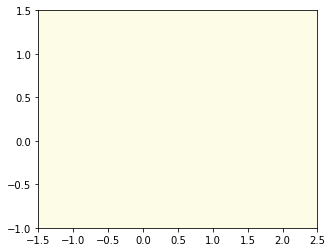

In [21]:
# plt.figure(figsize=(11,4))
# plt.subplot(121)
# plot_decision_boundary(tree_clf, X, y)
# plt.title("Decision Tree", fontsize=14)
# plt.subplot(122)
# plot_decision_boundary(bag_clf, X, y)
# plt.title("Decision Trees with Bagging", fontsize=14)
# save_fig("decision_tree_without_and_with_bagging_plot")
# plt.show()

In [ ]:
# tree_clf = DecisionTreeClassifier(random_state=42)
# tree_clf.fit(X_train, y_train)
# y_pred_tree = tree_clf.predict(X_test)
# print(accuracy_score(y_test, y_pred_tree))

In [ ]:
# # 回帰係数
# print(clf.coef_)
 
# # 切片 (誤差)
# print(clf.intercept_)
 
# # 決定係数
# print(clf.score(X_train, y_train))

### スタッキング

In [22]:
import numpy as np

# from ..base import Ensemble
# from ..combination.combiner import Combiner

from sklearn import cross_validation


class EnsembleStack(object):

    def __init__(self, mode='probs', cv=5):
        self.mode = mode
        self.layers = []
        self.cv = cv

    def add_layer(self, ensemble):
        if isinstance(ensemble, Ensemble):
            self.layers.append(ensemble)
        else:
            raise Exception('not an Ensemble object')

    def fit_layer(self, layer_idx, X, y):
        if layer_idx >= len(self.layers):
            return
        elif layer_idx == len(self.layers) - 1:
            self.layers[layer_idx].fit(X, y)
        else:
            n_classes = len(set(y)) - 1
            n_classifiers = len(self.layers[layer_idx])
            output = np.zeros((X.shape[0], n_classes * n_classifiers))
            skf = cross_validation.StratifiedKFold(y, self.cv)
            for tra, tst in skf:
                self.layers[layer_idx].fit(X[tra], y[tra])
                out = self.layers[layer_idx].output(X[tst], mode=self.mode)
                output[tst, :] = out[:, 1:, :].reshape(
                    out.shape[0], (out.shape[1] - 1) * out.shape[2])

            self.layers[layer_idx].fit(X, y)
            self.fit_layer(layer_idx + 1, output, y)

    def fit(self, X, y):
        if self.cv > 1:
            self.fit_layer(0, X, y)
        else:
            X_ = X
            for layer in self.layers:
                layer.fit(X_, y)
                out = layer.output(X_, mode=self.mode)
                X_ = out[:, 1:, :].reshape(
                    out.shape[0], (out.shape[1] - 1) * out.shape[2])

        return self

    def output(self, X):
        input_ = X

        for layer in self.layers:
            out = layer.output(input_, mode=self.mode)
            input_ = out[:, 1:, :].reshape(
                out.shape[0], (out.shape[1] - 1) * out.shape[2])

        return out


class EnsembleStackClassifier(object):

    def __init__(self, stack, combiner=None):
        self.stack = stack
        if combiner is None:
            self.combiner = Combiner(rule='mean')
        elif isinstance(combiner, str):
            if combiner == 'majority_vote':
                raise ValueError('EnsembleStackClassifier '
                        'do not support majority_vote')
            self.combiner = Combiner(rule=combiner)
        elif isinstance(combiner, Combiner):
            self.combiner = combiner
        else:
            raise ValueError('Invalid combiner!')


    def fit(self, X, y):
        self.stack.fit(X, y)
        return self
        
    def predict(self, X):
        out = self.stack.output(X)
        return self.combiner.combine(out)

    def predict_proba(self, X):
        out = self.stack.output(X)
        return np.mean(out, axis=2)